# Assigment 3: k-layers

### Preprocessing

In [1]:
import data.classifier as cls
import data.layer as layer
from data.load_data import *
from src.utils import *
import importlib 

In [2]:
data = load_data()
data = preprocessing(data)
data.keys()

dict_keys(['train_data', 'validation_data', 'test_data'])

## Exercise 1: Upgrade assigment 2 and test k-layer net-works


### Compute gradients of a 2-layer network

Build a 2-layer network that calculates gradients

In [3]:
"""importlib.reload(cls)
layers = 2
input_nodes = len(data['train_data']['data'][:, :10])
hidden_nodes = 10
output_nodes = len(data['train_data']['one_hot'])


classifier = cls.Classifier()
classifier.add_layer(n=hidden_nodes, input_nodes=input_nodes)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes)

predictions = classifier.predict(data['train_data']['data'],complete=True)
assert len(predictions) == layers + 1 #this should be number of layers + 1
grad_w,grad_b = classifier.compute_gradients(data['train_data']['data'][:, :20],
                                               data['train_data']['one_hot'][:, :20],lambda_reg=0,eta=0.1)

classifier2 = cls.Classifier()
classifier2.add_layer(n=hidden_nodes, input_nodes=input_nodes)
classifier2.add_layer(n=output_nodes,input_nodes=hidden_nodes)
grad_w_num,grad_b_num = classifier2.check_gradients_num(data['train_data']['data'][:, :20],
                                          data['train_data']['one_hot'][:, :20],
                                            1e-6)
for l in range(len(grad_w)):
    print(f'gradient_w{l+1} well calculated: ', check_matrices(grad_w[l], grad_w_num[l]))
    print(f'gradient_b{l+1} well calculated: ', check_matrices(grad_b[l], grad_b_num[l]))"""

"importlib.reload(cls)\nlayers = 2\ninput_nodes = len(data['train_data']['data'][:, :10])\nhidden_nodes = 10\noutput_nodes = len(data['train_data']['one_hot'])\n\n\nclassifier = cls.Classifier()\nclassifier.add_layer(n=hidden_nodes, input_nodes=input_nodes)\nclassifier.add_layer(n=output_nodes,input_nodes=hidden_nodes)\n\npredictions = classifier.predict(data['train_data']['data'],complete=True)\nassert len(predictions) == layers + 1 #this should be number of layers + 1\ngrad_w,grad_b = classifier.compute_gradients(data['train_data']['data'][:, :20],\n                                               data['train_data']['one_hot'][:, :20],lambda_reg=0,eta=0.1)\n\nclassifier2 = cls.Classifier()\nclassifier2.add_layer(n=hidden_nodes, input_nodes=input_nodes)\nclassifier2.add_layer(n=output_nodes,input_nodes=hidden_nodes)\ngrad_w_num,grad_b_num = classifier2.check_gradients_num(data['train_data']['data'][:, :20],\n                                          data['train_data']['one_hot'][:, :20]

### Compute gradients of a 3-layer network

Build a 3-layer network that calculates gradients

In [4]:
"""importlib.reload(cls)
layers = 3
input_nodes = len(data['train_data']['data'][:, :10])
hidden_nodes1 = 10
hidden_nodes2 = 8
output_nodes = len(data['train_data']['one_hot'])

classifier = cls.Classifier()
classifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes2)

predictions = classifier.predict(data['train_data']['data'],complete=True)
assert len(predictions) == layers + 1 #this should be number of layers + 1
grad_w,grad_b  = classifier.compute_gradients(data['train_data']['data'][:, :20],
                                               data['train_data']['one_hot'][:, :20],lambda_reg=0,eta=0.1)

classifier2 = cls.Classifier()
classifier2.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier2.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier2.add_layer(n=output_nodes,input_nodes=hidden_nodes2)

grad_w_num,grad_b_num = classifier2.check_gradients_num(data['train_data']['data'][:, :20],
                                          data['train_data']['one_hot'][:, :20],
                                            1e-6)
                                      
for l in range(len(grad_w)):
    print(f'gradient_w{l+1} well calculated: ', check_matrices(grad_w[l], grad_w_num[l]))
    print(f'gradient_b{l+1} well calculated: ', check_matrices(grad_b[l], grad_b_num[l]))"""

"importlib.reload(cls)\nlayers = 3\ninput_nodes = len(data['train_data']['data'][:, :10])\nhidden_nodes1 = 10\nhidden_nodes2 = 8\noutput_nodes = len(data['train_data']['one_hot'])\n\nclassifier = cls.Classifier()\nclassifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)\nclassifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)\nclassifier.add_layer(n=output_nodes,input_nodes=hidden_nodes2)\n\npredictions = classifier.predict(data['train_data']['data'],complete=True)\nassert len(predictions) == layers + 1 #this should be number of layers + 1\ngrad_w,grad_b  = classifier.compute_gradients(data['train_data']['data'][:, :20],\n                                               data['train_data']['one_hot'][:, :20],lambda_reg=0,eta=0.1)\n\nclassifier2 = cls.Classifier()\nclassifier2.add_layer(n=hidden_nodes1, input_nodes=input_nodes)\nclassifier2.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)\nclassifier2.add_layer(n=output_nodes,input_nodes=hidden_nodes2)\n\ngrad_w_num,gra

### Compute gradients of a 4-layer network

In [5]:
"""importlib.reload(cls)
layers = 4
input_nodes = len(data['train_data']['data'][:, :10])
hidden_nodes1 = 10
hidden_nodes2 = 8
hidden_nodes3 = 11
output_nodes = len(data['train_data']['one_hot'])

classifier = cls.Classifier()
classifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier.add_layer(n=hidden_nodes3, input_nodes=hidden_nodes2)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes3)

predictions = classifier.predict(data['train_data']['data'],complete=True)
assert len(predictions) == layers + 1 #this should be number of layers + 1
parameters = classifier.compute_gradients(data['train_data']['data'][:, :20],
                                               data['train_data']['one_hot'][:, :20],lambda_reg=0,eta=0.1)

classifier2 = cls.Classifier()
classifier2.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier2.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier2.add_layer(n=hidden_nodes3, input_nodes=hidden_nodes2)
classifier2.add_layer(n=output_nodes,input_nodes=hidden_nodes3)

W,b = classifier2.check_gradients_num(data['train_data']['data'][:, :20],
                                          data['train_data']['one_hot'][:, :20],
                                            1e-6)
                                      
for l in range(len(grad_w)):
    print(f'gradient_w{l+1} well calculated: ', check_matrices(grad_w[l], grad_w_num[l]))
    print(f'gradient_b{l+1} well calculated: ', check_matrices(grad_b[l], grad_b_num[l]))"""

"importlib.reload(cls)\nlayers = 4\ninput_nodes = len(data['train_data']['data'][:, :10])\nhidden_nodes1 = 10\nhidden_nodes2 = 8\nhidden_nodes3 = 11\noutput_nodes = len(data['train_data']['one_hot'])\n\nclassifier = cls.Classifier()\nclassifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)\nclassifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)\nclassifier.add_layer(n=hidden_nodes3, input_nodes=hidden_nodes2)\nclassifier.add_layer(n=output_nodes,input_nodes=hidden_nodes3)\n\npredictions = classifier.predict(data['train_data']['data'],complete=True)\nassert len(predictions) == layers + 1 #this should be number of layers + 1\nparameters = classifier.compute_gradients(data['train_data']['data'][:, :20],\n                                               data['train_data']['one_hot'][:, :20],lambda_reg=0,eta=0.1)\n\nclassifier2 = cls.Classifier()\nclassifier2.add_layer(n=hidden_nodes1, input_nodes=input_nodes)\nclassifier2.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)\

## Exercise 2: Can I train multi-layer networks?

### Training a 2-layer network

In [6]:
"""importlib.reload(cls)
data = load_no_validation()
data = preprocessing(data)

layers = 2
input_nodes = len(data['train_data']['data'])
hidden_nodes = 50
output_nodes = len(data['train_data']['one_hot'])

n_batch = 90
cycles = 3
n_s = 1000
n = len(data['train_data']['data'][0])
epochs = int(cycles*n_s*2/(n/n_batch))

classifier = cls.Classifier()
classifier.add_layer(n=hidden_nodes, input_nodes=input_nodes)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes)
metrics = classifier.fit(data['train_data']['data'], data['train_data']['one_hot'],
                         data['validation_data']['data'], data['validation_data']['one_hot'],
                         data['train_data']['labels'],
                         data['validation_data']['labels'],
                         'cross-entropy',
                         n_batch=n_batch, eta=1e-5, n_epochs=epochs, lamda=0.0009, eta_min=1e-5, eta_max=1e-1, n_s=n_s)

error_plot_normal(metrics['accuracy_train'], metrics['accuracy_val'], "Accuracy")
error_plot_normal(metrics['loss_train'], metrics['loss_val'], "Loss")
prediction_test = classifier.predict(data['test_data']['data'])
test_accuracy = classifier.compute_accuracy(data['test_data']['labels'],prediction_test)
print("Test accuracy:" ,test_accuracy)
"""

'importlib.reload(cls)\ndata = load_no_validation()\ndata = preprocessing(data)\n\nlayers = 2\ninput_nodes = len(data[\'train_data\'][\'data\'])\nhidden_nodes = 50\noutput_nodes = len(data[\'train_data\'][\'one_hot\'])\n\nn_batch = 90\ncycles = 3\nn_s = 1000\nn = len(data[\'train_data\'][\'data\'][0])\nepochs = int(cycles*n_s*2/(n/n_batch))\n\nclassifier = cls.Classifier()\nclassifier.add_layer(n=hidden_nodes, input_nodes=input_nodes)\nclassifier.add_layer(n=output_nodes,input_nodes=hidden_nodes)\nmetrics = classifier.fit(data[\'train_data\'][\'data\'], data[\'train_data\'][\'one_hot\'],\n                         data[\'validation_data\'][\'data\'], data[\'validation_data\'][\'one_hot\'],\n                         data[\'train_data\'][\'labels\'],\n                         data[\'validation_data\'][\'labels\'],\n                         \'cross-entropy\',\n                         n_batch=n_batch, eta=1e-5, n_epochs=epochs, lamda=0.0009, eta_min=1e-5, eta_max=1e-1, n_s=n_s)\n\nerror_pl

### Training a 3-layer network

Added: Xavier initialization +Random shuffling 

In [7]:
"""importlib.reload(cls)
data = load_no_validation()
data = preprocessing(data)

layers = 3
input_nodes = len(data['train_data']['data'])
hidden_nodes1 = 50
hidden_nodes2 = 50
output_nodes = len(data['train_data']['one_hot'])

n_batch = 100
cycles = 2
n_s = 5*49000/n_batch
n = len(data['train_data']['data'][0])
epochs = int(cycles*n_s*2/(n/n_batch))
lamda = 0.005

classifier = cls.Classifier()
classifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes2)
metrics = classifier.fit(data['train_data']['data'], data['train_data']['one_hot'],
                         data['validation_data']['data'], data['validation_data']['one_hot'],
                         data['train_data']['labels'],
                         data['validation_data']['labels'],
                         'cross-entropy',
                         n_batch=n_batch, eta=1e-5, n_epochs=epochs, lamda=lamda, eta_min=1e-5, eta_max=1e-1, n_s=n_s)
error_plot_normal(metrics['accuracy_train'], metrics['accuracy_val'], "Accuracy")
error_plot_normal(metrics['loss_train'], metrics['loss_val'], "Loss")
prediction_test = classifier.predict(data['test_data']['data'])
test_accuracy = classifier.compute_accuracy(data['test_data']['labels'],prediction_test)
print("Test accuracy:" ,test_accuracy)"""

'importlib.reload(cls)\ndata = load_no_validation()\ndata = preprocessing(data)\n\nlayers = 3\ninput_nodes = len(data[\'train_data\'][\'data\'])\nhidden_nodes1 = 50\nhidden_nodes2 = 50\noutput_nodes = len(data[\'train_data\'][\'one_hot\'])\n\nn_batch = 100\ncycles = 2\nn_s = 5*49000/n_batch\nn = len(data[\'train_data\'][\'data\'][0])\nepochs = int(cycles*n_s*2/(n/n_batch))\nlamda = 0.005\n\nclassifier = cls.Classifier()\nclassifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)\nclassifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)\nclassifier.add_layer(n=output_nodes,input_nodes=hidden_nodes2)\nmetrics = classifier.fit(data[\'train_data\'][\'data\'], data[\'train_data\'][\'one_hot\'],\n                         data[\'validation_data\'][\'data\'], data[\'validation_data\'][\'one_hot\'],\n                         data[\'train_data\'][\'labels\'],\n                         data[\'validation_data\'][\'labels\'],\n                         \'cross-entropy\',\n               

### Training a 9-layer network

In [8]:
"""importlib.reload(cls)
layers = 3
input_nodes = len(data['train_data']['data'])
output_nodes = len(data['train_data']['one_hot'])
nodes = [input_nodes, 50, 30, 20, 20, 10, 10, 10, 10, output_nodes]
n_batch = 100
cycles = 2
n_s = 5*49000/n_batch
n = len(data['train_data']['data'][0])
epochs = int(cycles*n_s*2/(n/n_batch))
lamda = 0.005

classifier = cls.Classifier()
for i in range(len(nodes)-1):
    classifier.add_layer(n=nodes[i+1], input_nodes=nodes[i])

metrics = classifier.fit(data['train_data']['data'], data['train_data']['one_hot'],
                         data['validation_data']['data'], data['validation_data']['one_hot'],
                         data['train_data']['labels'],
                         data['validation_data']['labels'],
                         'cross-entropy',
                         n_batch=n_batch, eta=1e-5, n_epochs=epochs, lamda=lamda, eta_min=1e-5, eta_max=1e-1, n_s=n_s)
error_plot_normal(metrics['accuracy_train'], metrics['accuracy_val'], "Accuracy")
error_plot_normal(metrics['loss_train'], metrics['loss_val'], "Loss")
prediction_test = classifier.predict(data['test_data']['data'])
test_accuracy = classifier.compute_accuracy(data['test_data']['labels'],prediction_test)
print("Test accuracy:" ,test_accuracy)"""

'importlib.reload(cls)\nlayers = 3\ninput_nodes = len(data[\'train_data\'][\'data\'])\noutput_nodes = len(data[\'train_data\'][\'one_hot\'])\nnodes = [input_nodes, 50, 30, 20, 20, 10, 10, 10, 10, output_nodes]\nn_batch = 100\ncycles = 2\nn_s = 5*49000/n_batch\nn = len(data[\'train_data\'][\'data\'][0])\nepochs = int(cycles*n_s*2/(n/n_batch))\nlamda = 0.005\n\nclassifier = cls.Classifier()\nfor i in range(len(nodes)-1):\n    classifier.add_layer(n=nodes[i+1], input_nodes=nodes[i])\n\nmetrics = classifier.fit(data[\'train_data\'][\'data\'], data[\'train_data\'][\'one_hot\'],\n                         data[\'validation_data\'][\'data\'], data[\'validation_data\'][\'one_hot\'],\n                         data[\'train_data\'][\'labels\'],\n                         data[\'validation_data\'][\'labels\'],\n                         \'cross-entropy\',\n                         n_batch=n_batch, eta=1e-5, n_epochs=epochs, lamda=lamda, eta_min=1e-5, eta_max=1e-1, n_s=n_s)\nerror_plot_normal(metrics[

## Exercise 3: Batch Normalization 

In [9]:
"""layers = 3
input_nodes = len(data['train_data']['data'][:, :10])
hidden_nodes1 = 11
hidden_nodes2 = 8
output_nodes = len(data['train_data']['one_hot'])

classifier = cls.Classifier()
classifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes2)


grad_w,grad_b,grad_gamma,grad_beta  = classifier.compute_gradients(data['train_data']['data'][:, :20],
                                               data['train_data']['one_hot'][:, :20],lambda_reg=0,eta=0.1,batch_norm=True)

classifier2 = cls.Classifier()
classifier2.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier2.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier2.add_layer(n=output_nodes,input_nodes=hidden_nodes2)

W_grads, b_grads, gamma_grads, beta_grads= classifier2.check_gradients_num_batch(data['train_data']['data'][:, :20],
                                          data['train_data']['one_hot'][:, :20],
                                            1e-6)

for l in range(len(grad_w)):
    print(f'gradient_w{l+1} well calculated: ', check_matrices(grad_w[l], W_grads[l]))
    print(f'gradient_b{l+1} well calculated: ', check_matrices(grad_b[l], b_grads[l]))
    
for l in range(len(grad_gamma)):
    print(f'gradient_w{l+1} well calculated: ', check_matrices(grad_gamma[l], gamma_grads[l]))
    print(f'gradient_b{l+1} well calculated: ', check_matrices(grad_beta[l], beta_grads[l]))"""

"layers = 3\ninput_nodes = len(data['train_data']['data'][:, :10])\nhidden_nodes1 = 11\nhidden_nodes2 = 8\noutput_nodes = len(data['train_data']['one_hot'])\n\nclassifier = cls.Classifier()\nclassifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)\nclassifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)\nclassifier.add_layer(n=output_nodes,input_nodes=hidden_nodes2)\n\n\ngrad_w,grad_b,grad_gamma,grad_beta  = classifier.compute_gradients(data['train_data']['data'][:, :20],\n                                               data['train_data']['one_hot'][:, :20],lambda_reg=0,eta=0.1,batch_norm=True)\n\nclassifier2 = cls.Classifier()\nclassifier2.add_layer(n=hidden_nodes1, input_nodes=input_nodes)\nclassifier2.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)\nclassifier2.add_layer(n=output_nodes,input_nodes=hidden_nodes2)\n\nW_grads, b_grads, gamma_grads, beta_grads= classifier2.check_gradients_num_batch(data['train_data']['data'][:, :20],\n                                

## Training a 3-layer network

In [10]:
"""importlib.reload(cls)
data = load_no_validation()
data = preprocessing(data)

layers = 3
input_nodes = len(data['train_data']['data'])
hidden_nodes1 = 50
hidden_nodes2 = 50
output_nodes = len(data['train_data']['one_hot'])

n_batch = 100
cycles = 2
n_s = 5*49000/n_batch
n = len(data['train_data']['data'][0])
epochs = int(cycles*n_s*2/(n/n_batch))
lamda = 0.005

classifier = cls.Classifier()
classifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes2)
metrics = classifier.fit(data['train_data']['data'], data['train_data']['one_hot'],
                         data['validation_data']['data'], data['validation_data']['one_hot'],
                         data['train_data']['labels'],
                         data['validation_data']['labels'],
                         'cross-entropy',
                         n_batch=n_batch, eta=1e-5, n_epochs=epochs, lamda=lamda, eta_min=1e-5, eta_max=1e-1, n_s=n_s)
error_plot_normal(metrics['accuracy_train'], metrics['accuracy_val'], "Accuracy")
error_plot_normal(metrics['loss_train'], metrics['loss_val'], "Loss")
prediction_test = classifier.predict(data['test_data']['data'])
test_accuracy = classifier.compute_accuracy(data['test_data']['labels'],prediction_test)
print("Test accuracy:" ,test_accuracy)"""

'importlib.reload(cls)\ndata = load_no_validation()\ndata = preprocessing(data)\n\nlayers = 3\ninput_nodes = len(data[\'train_data\'][\'data\'])\nhidden_nodes1 = 50\nhidden_nodes2 = 50\noutput_nodes = len(data[\'train_data\'][\'one_hot\'])\n\nn_batch = 100\ncycles = 2\nn_s = 5*49000/n_batch\nn = len(data[\'train_data\'][\'data\'][0])\nepochs = int(cycles*n_s*2/(n/n_batch))\nlamda = 0.005\n\nclassifier = cls.Classifier()\nclassifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)\nclassifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)\nclassifier.add_layer(n=output_nodes,input_nodes=hidden_nodes2)\nmetrics = classifier.fit(data[\'train_data\'][\'data\'], data[\'train_data\'][\'one_hot\'],\n                         data[\'validation_data\'][\'data\'], data[\'validation_data\'][\'one_hot\'],\n                         data[\'train_data\'][\'labels\'],\n                         data[\'validation_data\'][\'labels\'],\n                         \'cross-entropy\',\n               

100%|██████████| 20/20 [01:19<00:00,  3.96s/it]


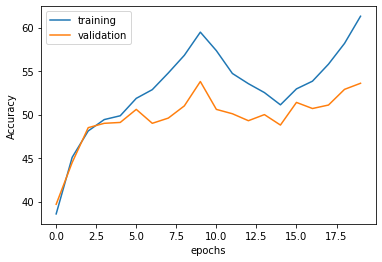

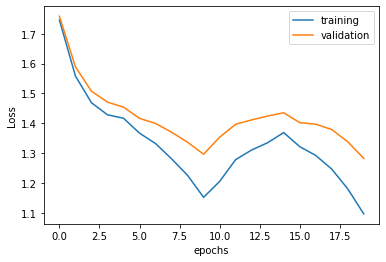

Test accuracy: 52.949999999999996


In [12]:
importlib.reload(cls)
data = load_no_validation()
data = preprocessing(data)

layers = 3
input_nodes = len(data['train_data']['data'])
hidden_nodes1 = 50
hidden_nodes2 = 50
output_nodes = len(data['train_data']['one_hot'])

n_batch = 100
cycles = 2
n_s = 5*49000/n_batch
n = len(data['train_data']['data'][0])
epochs = int(cycles*n_s*2/(n/n_batch))
lamda = 0.005

classifier = cls.Classifier()
classifier.add_layer(n=hidden_nodes1, input_nodes=input_nodes)
classifier.add_layer(n=hidden_nodes2, input_nodes=hidden_nodes1)
classifier.add_layer(n=output_nodes,input_nodes=hidden_nodes2)
metrics = classifier.fit(data['train_data']['data'], data['train_data']['one_hot'],
                         data['validation_data']['data'], data['validation_data']['one_hot'],
                         data['train_data']['labels'],
                         data['validation_data']['labels'],
                         'cross-entropy',
                         n_batch=n_batch, eta=1e-5, n_epochs=epochs, lamda=lamda, eta_min=1e-5, eta_max=1e-1, n_s=n_s, batch_norm=True)
error_plot_normal(metrics['accuracy_train'], metrics['accuracy_val'], "Accuracy")
error_plot_normal(metrics['loss_train'], metrics['loss_val'], "Loss")
prediction_test = classifier.predict(data['test_data']['data'],batch_normalization=True)
test_accuracy = classifier.compute_accuracy(data['test_data']['labels'],prediction_test)
print("Test accuracy:" ,test_accuracy)